***Excercise 1:***

**DISCLAIMER:** Since the exam asks to show what I did to solve the question, I am showing it, even if my notebook looks a bit messy. Otherwise, I would have made my notebook look better.

***

#### **Playing around a little:**

In [1]:
dictionary = {
    "profile_id": "1f5833f4e027e0a127f116145037000000000000",
    "registry_location": "mx",
    "full_name": "Juan Perez Perez",
    "document": [
        {
            "type": "work",
            "address": {
                "full_address": "Porvenir 214, Peñuelas, Queretaro, Santiago de Queretaro, Mexico CP. 76140",
                "address_line_1": "",
                "address_line_2": "",
                "city": "",
                "foad": "",
                "soad": "",
                "postal_code": "",
                "country": "Mexico",
                "phone": ["4420000001"],
                "fax": [],
                "email": ["example@domain.mx"]
            },
            "number": "",
            "description": ""
        }
      ],
    "status": "",
    "ad_hoc": []
}

In [2]:
dictionary

{'profile_id': '1f5833f4e027e0a127f116145037000000000000',
 'registry_location': 'mx',
 'full_name': 'Juan Perez Perez',
 'document': [{'type': 'work',
   'address': {'full_address': 'Porvenir 214, Peñuelas, Queretaro, Santiago de Queretaro, Mexico CP. 76140',
    'address_line_1': '',
    'address_line_2': '',
    'city': '',
    'foad': '',
    'soad': '',
    'postal_code': '',
    'country': 'Mexico',
    'phone': ['4420000001'],
    'fax': [],
    'email': ['example@domain.mx']},
   'number': '',
   'description': ''}],
 'status': '',
 'ad_hoc': []}

In [3]:
a = dictionary["document"][0]["address"]["full_address"]
print(a)

Porvenir 214, Peñuelas, Queretaro, Santiago de Queretaro, Mexico CP. 76140


In [4]:
import json 
  
# Opening JSON file 
json_file = open('one_dict.json',) 
  
# returns JSON object as  
# a dictionary 
data = json.load(json_file) 
  
# Iterating through the json 
# list 
for n,i in enumerate(data, start=1): 
    if n == 4:
        print(data[i])
    else:
        print(i)
        print('\r')
    
json_file.close() 


profile_id

registry_location

full_name

[{'type': 'work', 'address': {'full_address': 'Porvenir 214, PeÃ±uelas, Queretaro, Santiago de Queretaro, Mexico CP. 76140', 'address_line_1': '', 'address_line_2': '', 'city': '', 'foad': '', 'soad': '', 'postal_code': '', 'country': 'Mexico', 'phone': ['4420000001'], 'fax': [], 'email': ['example@domain.mx']}, 'number': '', 'description': ''}]
status

ad_hoc



In [5]:
import json 
  
# Opening JSON file 
json_file = open('one_dict.json',) 
  
# returns JSON object as  
# a dictionary 
data = json.load(json_file) 
  
# Iterating through the json 
# list 
for n,i in enumerate(data, start=1): 
    if n == 4:
        print(data[i])
    else:
        print(data[i])
        print('\r')
    
json_file.close()

1f5833f4e027e0a127f116145037000000008642

mx

Vanessa Morales LÃ³pez

[{'type': 'work', 'address': {'full_address': 'Porvenir 214, PeÃ±uelas, Queretaro, Santiago de Queretaro, Mexico CP. 76140', 'address_line_1': '', 'address_line_2': '', 'city': '', 'foad': '', 'soad': '', 'postal_code': '', 'country': 'Mexico', 'phone': ['4420000001'], 'fax': [], 'email': ['example@domain.mx']}, 'number': '', 'description': ''}]


[]



***

#### **The final algorithm to retrieve the "profile_id" and "address" (when applicable):**

In [6]:
import json, csv, os

# path = "home/user/Documents/candidates_documents/" # INSTEAD THE VARIABLE "path" below, PLEASE, USE THIS ONE. Thank you :)
path = "Dictionaries/"
dictionary_paths = [f"{path}{dict_path}" for dict_path in os.listdir(path) if dict_path != ".ipynb_checkpoints"]

with open("user_data.tsv", 'w') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter='\t')
                
    data_to_save = [("profile_id", "address")] # Placeholders. In this case, the name of the columns.
    
    for path in dictionary_paths:
        # Opening JSON file 
        json_file = open(f"{path}", encoding="utf-8")
        data = json.load(json_file)
        
        # Saving the "profile_id" and "the address" (when type = "work"), from the JSON files:
        flag, support_list = 0, list()
        for field in data:
            if field == "profile_id":
                support_list.append(data[field])
                flag += 1
            elif field == "document" and data[field][0]["type"] == "work":
                support_list.append(data[field][0]["address"]["full_address"])
                flag += 1
            if flag == 2:
                data_to_save.append(tuple(support_list))
                flag, support_list = 0, list()
    
    # Dumping the content inside the "tsv" file.
    for user_data in data_to_save:
        csv_writer.writerow([data_ for data_ in user_data])
    
    json_file.close()

*Use the **notepad** app in your computer to open the resulting file. You can also use **excel** too, but you need to specify that you want to open the file using excel directly in the properties option from the document.tsv*  

An example:

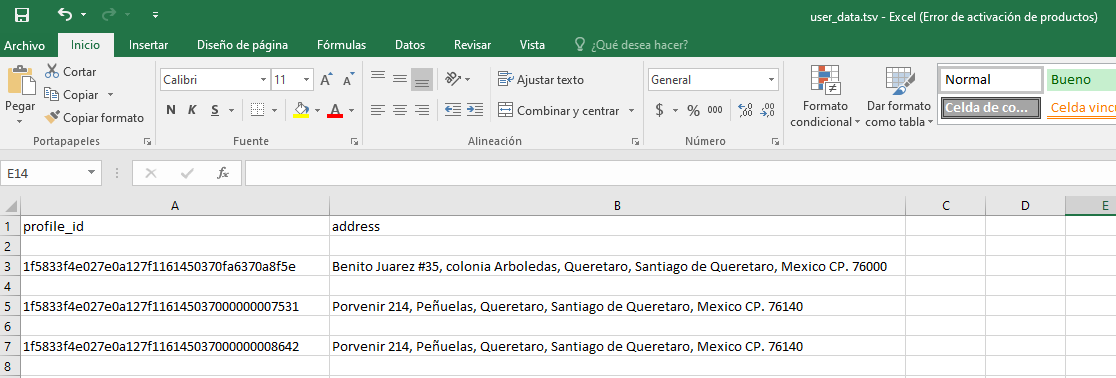

In [7]:
from PIL import Image

tsv_in_excel = Image.open("tsv_file.PNG")
tsv_in_excel

***

#### **Reading the ".tsv" file directly in python, as a dictionary:**

In [8]:
tsv_file = open("user_data.tsv")

read_tsv = csv.DictReader(tsv_file, delimiter="\t")

for row in read_tsv:
    print(row)

{'profile_id': '1f5833f4e027e0a127f1161450370fa6370a8f5e', 'address': 'Benito Juarez #35, colonia Arboledas, Queretaro, Santiago de Queretaro, Mexico CP. 76000'}
{'profile_id': '1f5833f4e027e0a127f116145037000000007531', 'address': 'Porvenir 214, Peñuelas, Queretaro, Santiago de Queretaro, Mexico CP. 76140'}
{'profile_id': '1f5833f4e027e0a127f116145037000000008642', 'address': 'Porvenir 214, Peñuelas, Queretaro, Santiago de Queretaro, Mexico CP. 76140'}


***

#### **Summary:**

1. At the beginning I wasn't pretty sure about the instructions. Then I asked to Carlos about what I had understood.

2. Once he answered and clarified my doubts, I started working on the question.

3. The first thing I focused on was: How to get the ** profile_id ** and the ** address ** itself. I did not consider if the type of address was work, home or school, I just wanted to know how to obtain the requested data.

4. Since I needed some refresh, I started searching the internet for general info about csv files and json files with python (I've worked with those kind of files, but there was some stuff I didn't remember). The pages where I looked for the information were:

    https://www.youtube.com/watch?v=q5uM4VKywbA  
    https://www.geeksforgeeks.org/read-json-file-using-python/

5. The next step was to load json files, so, what I did was to create 5 json files to test my code. Once those files were created, I started to get the requested data from json files, but, this time, considering the type of address.

6. When I was able to get the data from users whose type of address was **work**, I had to think and play around some more, because of the data. It wasn't being displayed correctly due to the special chars (ñ, or accents). The main problem here, was the **encoding**, so I made this param equal to **utf-8**. Finally, when the retrieved data was correctly displayed, I got so happy.